# Project: Cook County Housing Price Prediction



<hr style="border: 1px solid #fdb515;" />
<hr style="border: 5px solid #003262;" />
<br/><br/>

## Introduction

This project explores what can be learned from an extensive housing dataset that is embedded in a dense social context in Cook County, Illinois.

First, we will guide you through some basic Exploratory Data Analysis (EDA) to understand the structure of the data. Next, you will be adding a few new features to the dataset, while cleaning the data as well in the process.

Next, you will specify and fit a linear model for the purpose of prediction. Finally, we will analyze the error of the model and brainstorm ways to improve the model's performance.


In [1]:
import numpy as np

import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import zipfile
import os

# Plot settings
plt.rcParams['figure.figsize'] = (12, 9)
plt.rcParams['font.size'] = 12

<br/><br/>
<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

# The Data

The dataset consists of over 500,000 records from Cook County, Illinois, the county where Chicago is located. The dataset has 61 features in total; the 62nd is `Sale Price`, which you will predict with regression. An explanation of each variable can be found in the included `codebook.txt` file (you can optionally open this by first clicking the `data` folder, then clicking `codebook.txt` file in the navigation pane). Some of the columns have been filtered out to ensure this assignment doesn't become overly long when dealing with data cleaning and formatting.

The data are split into training and test sets with 204,792 and 68,264 observations, respectively, but we will only be working on the training set for EDA

Let's first extract the data from the `cook_county_data.zip`. Notice we didn't leave the `csv` files directly in the directory because they take up too much space without some prior compression. Just run the cells below: 

In [2]:
with zipfile.ZipFile('data/cook_county_data.zip') as item:
    item.extractall()

Let's load the initial data.

In [3]:
initial_data = pd.read_csv("cook_county_train.csv",index_col='Unnamed: 0')

In [4]:
initial_data

,PIN,Property Class,Neighborhood Code,Land Square Feet,Town Code,Apartments,Wall Material,Roof Material,Basement,Basement Finish,...,Sale Month of Year,Sale Half of Year,Most Recent Sale,Age Decade,Pure Market Filter,Garage Indicator,Neigborhood Code (mapping),Town and Neighborhood,Description,Lot Size
0,17294100610000,203,50,2500.0,76,0.0,2.0,1.0,1.0,3.0,...,9,2,1.0,13.2,0,0.0,50,7650,"This property, sold on 09/14/2015, is a one-st...",2500.0
1,13272240180000,202,120,3780.0,71,0.0,2.0,1.0,1.0,1.0,...,5,1,1.0,9.6,1,1.0,120,71120,"This property, sold on 05/23/2018, is a one-st...",3780.0
2,25221150230000,202,210,4375.0,70,0.0,2.0,1.0,2.0,3.0,...,2,1,0.0,11.2,1,1.0,210,70210,"This property, sold on 02/18/2016, is a one-st...",4375.0
3,10251130030000,203,220,4375.0,17,0.0,3.0,1.0,1.0,3.0,...,7,2,1.0,6.3,1,1.0,220,17220,"This property, sold on 07/23/2013, is a one-st...",4375.0
4,31361040550000,202,120,8400.0,32,0.0,3.0,1.0,2.0,3.0,...,6,1,0.0,6.3,1,1.0,120,32120,"This property, sold on 06/10/2016, is a one-st...",8400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204787,25163010260000,202,321,4375.0,72,0.0,2.0,1.0,1.0,1.0,...,7,2,0.0,5.8,1,1.0,321,72321,"This property, sold on 07/23/2014, is a one-st...",4375.0
204788,5063010090000,204,21,16509.0,23,0.0,1.0,1.0,1.0,1.0,...,3,1,1.0,9.3,1,1.0,21,2321,"This property, sold on 03/27/2019, is a one-st...",16509.0
204789,16333020150000,202,90,3810.0,15,0.0,2.0,1.0,1.0,1.0,...,1,1,1.0,5.9,1,1.0,90,1590,"This property, sold on 01/31/2014, is a one-st...",3810.0
204790,9242030500000,203,80,6650.0,22,0.0,2.0,1.0,1.0,3.0,...,2,1,1.0,6.0,1,1.0,80,2280,"This property, sold on 02/22/2018, is a one-st...",6650.0


As a good sanity check, we should at least verify that the data shape matches the description.

In [5]:
# 204,792 observations and 62 features in training data
assert initial_data.shape == (204792, 62)
# Sale Price is provided in the training data
assert 'Sale Price' in initial_data.columns.values

The next order of business is getting a feel for the variables in our data.  A more detailed description of each variable is included in `codebook.txt` (in the same directory as this notebook).  **You should take some time to familiarize yourself with the codebook before moving forward.**

Let's take a quick look at all the current columns in our initial data.

In [6]:
initial_data.columns.values

array(['PIN', 'Property Class', 'Neighborhood Code', 'Land Square Feet',
       'Town Code', 'Apartments', 'Wall Material', 'Roof Material',
       'Basement', 'Basement Finish', 'Central Heating', 'Other Heating',
       'Central Air', 'Fireplaces', 'Attic Type', 'Attic Finish',
       'Design Plan', 'Cathedral Ceiling', 'Construction Quality',
       'Site Desirability', 'Garage 1 Size', 'Garage 1 Material',
       'Garage 1 Attachment', 'Garage 1 Area', 'Garage 2 Size',
       'Garage 2 Material', 'Garage 2 Attachment', 'Garage 2 Area',
       'Porch', 'Other Improvements', 'Building Square Feet',
       'Repair Condition', 'Multi Code', 'Number of Commercial Units',
       'Estimate (Land)', 'Estimate (Building)', 'Deed No.', 'Sale Price',
       'Longitude', 'Latitude', 'Census Tract',
       'Multi Property Indicator', 'Modeling Group', 'Age', 'Use',
       "O'Hare Noise", 'Floodplain', 'Road Proximity', 'Sale Year',
       'Sale Quarter', 'Sale Half-Year', 'Sale Quarter of Year'

In [7]:
initial_data['Description'][0]

'This property, sold on 09/14/2015, is a one-story houeshold located at 2950 S LYMAN ST.It has a total of 6 rooms, 3 of which are bedrooms, and 1.0 of which are bathrooms.'

<br/><br/>
<hr style="border: 1px solid #fdb515;" />

# Part 1: Contextualizing the Data



<!-- BEGIN QUESTION -->

<br><br>

---

## Question 1a

Based on the columns in this dataset and the values that they take, what do you think each row represents? That is, what is the granularity of this dataset? 

_each row represents a residential property in Cook County, identified by its unique PIN number_

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<br><br>

---
## Question 1b
Why do you think this data was collected? For what purposes? By whom?

This question calls for your speculation and is looking for thoughtfulness, not correctness. 

_This data was likely collected by the Cook County Assessor’s Office to assess property values for taxation, monitor real estate trends, and support public transparency._

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<br><br>

---
## Question 1c

Craft at least two questions about housing in Cook County that can be answered with this dataset and provide the type of analytical tool you would use to answer it (e.g. "I would create a ___ plot of ___ and ___" or "I would calculate the ___ [summary statistic] for ___ and ____"). Be sure to reference the columns that you would use and any additional datasets you would need to answer that question.

_Q1: How does the average sale price vary by neighborhood_

_I would create a boxplot of Sale Price grouped by Neighborhood Code_

_Q2: Is there a correlation between Building Square Feet and Sale Price_

_I would create a scatter plot of Building Square Feet and Sale Price_

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<br><br>

---
## Question 1d

Suppose now, in addition to the information already contained in the dataset, you also have access to several new columns containing demographic data about the owner, including race/ethnicity, gender, age, annual income, and occupation. Provide one new question about housing in Cook County that can be answered using at least one column of demographic data and at least one column of existing data and provide the type of analytical tool you would use to answer it.

_Q: Does the ethnicity of the property owner influence their choice of location when purchasing property?_

_I would create a Heatmap for each ethnicity showing the distribution of the owners from that ethnic group accross different Neighborhood Codes._

<!-- END QUESTION -->

<br/><br/>
<hr style="border: 1px solid #fdb515;" />

# Part 2: Exploratory Data Analysis

This dataset was collected by the [Cook County Assessor's Office](https://datacatalog.cookcountyil.gov/Property-Taxation/Archive-Cook-County-Assessor-s-Residential-Sales-D/5pge-nu6u) in order to build a model to predict the monetary value of a home. In this section, we will make a series of exploratory visualizations and feature engineering in preparation for that prediction task.

Note that we will perform EDA on the **initial data**.

### Sale Price
We begin by examining the distribution of our target variable `Sale Price`. We have provided the following helper method `plot_distribution` that you can use to visualize the distribution of the `Sale Price` using both the histogram and the box plot at the same time. Run the following 2 cells.

In [8]:
def plot_distribution(data, label):
    fig, axs = plt.subplots(nrows=2)

    sns.distplot(
        data[label], 
        ax=axs[0]
    )
    sns.boxplot(
        x=data[label],
        width=0.3, 
        ax=axs[1],
        showfliers=False,
    )

    # Align axes
    spacer = np.max(data[label]) * 0.05
    xmin = np.min(data[label]) - spacer
    xmax = np.max(data[label]) + spacer
    axs[0].set_xlim((xmin, xmax))
    axs[1].set_xlim((xmin, xmax))

    # Remove some axis text
    axs[0].xaxis.set_visible(False)
    axs[0].yaxis.set_visible(False)
    axs[1].yaxis.set_visible(False)

    # Put the two plots together
    plt.subplots_adjust(hspace=0)
    fig.suptitle("Distribution of " + label)

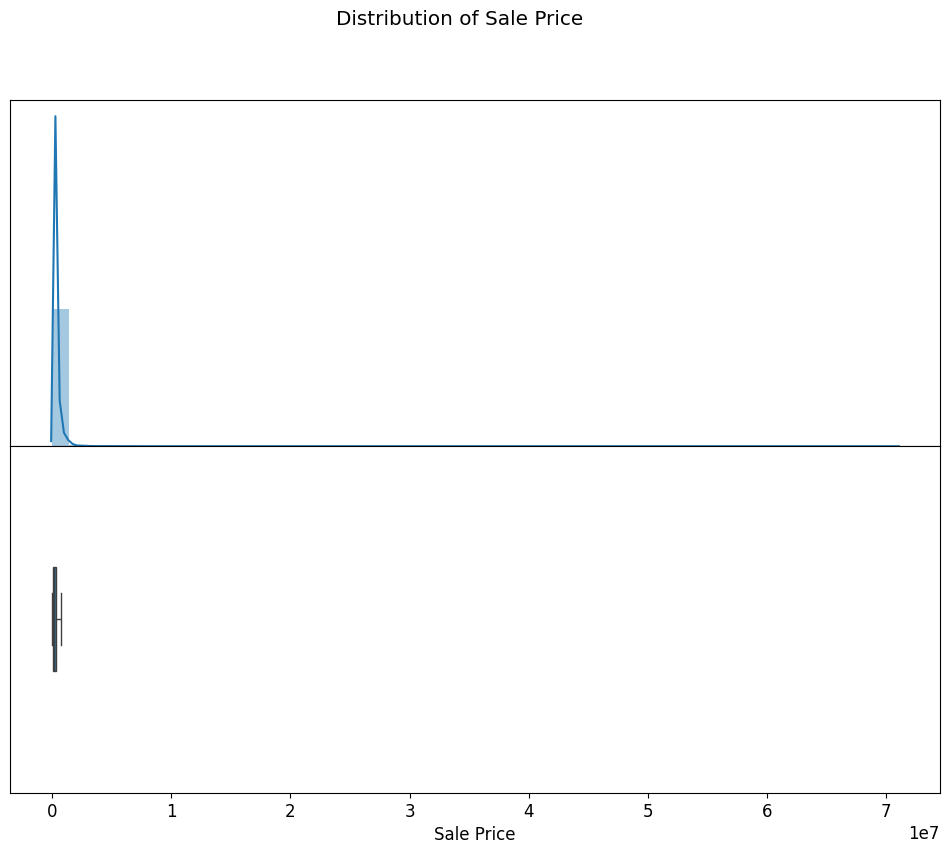

In [9]:
plot_distribution(initial_data, label='Sale Price')

At the same time, we also take a look at some descriptive statistics of this variable. Run the following cell.

In [10]:
initial_data['Sale Price'].describe()

count    2.047920e+05
mean     2.451646e+05
std      3.628694e+05
min      1.000000e+00
25%      4.520000e+04
50%      1.750000e+05
75%      3.120000e+05
max      7.100000e+07
Name: Sale Price, dtype: float64

<!-- BEGIN QUESTION -->

<br><br>

---
## Question 2a

Using the plots and the descriptive statistics from `initial_data['Sale Price'].describe()` above, identify one issue with the visualization above and briefly describe one way to overcome it. 

_Distribution of Sale Price has many outliers, making it hard to see the most of the properties of the distribution. Applying a log transformation to Sale Price can help standardize the distribution and make the plot easier to analyze_

<!-- END QUESTION -->



In [11]:
# optional cell for scratch work

<br><br>

---
## Question 2b

To zoom in on the visualization of most households, we will focus only on a subset of `Sale Price` for this assignment. In addition, it may be a good idea to apply a log transformation to `Sale Price`. In the cell below, assign `training_data` to a new `DataFrame` that is the same as `initial_data` **except with the following changes**:

- `training_data` should contain only households whose price is at least $500.
- `training_data` should contain a new `Log Sale Price` column that contains the log-transformed sale prices.

**You should NOT remove or modify the original column `Sale Price` as it will be helpful for later questions.** If you accidentally remove it, just restart your kernel and run the cells again.

**Note**: This also implies from now on, our target variable in the model will be the log-transformed sale prices from the column `Log Sale Price`. 

*To ensure that any error from this part does not propagate to later questions, there will be no hidden tests for this question.*

Let's create a new distribution plot using the log-transformed sale prices. As a sanity check, you should see that the distribution for `Log Scale Price` is much more uniform.

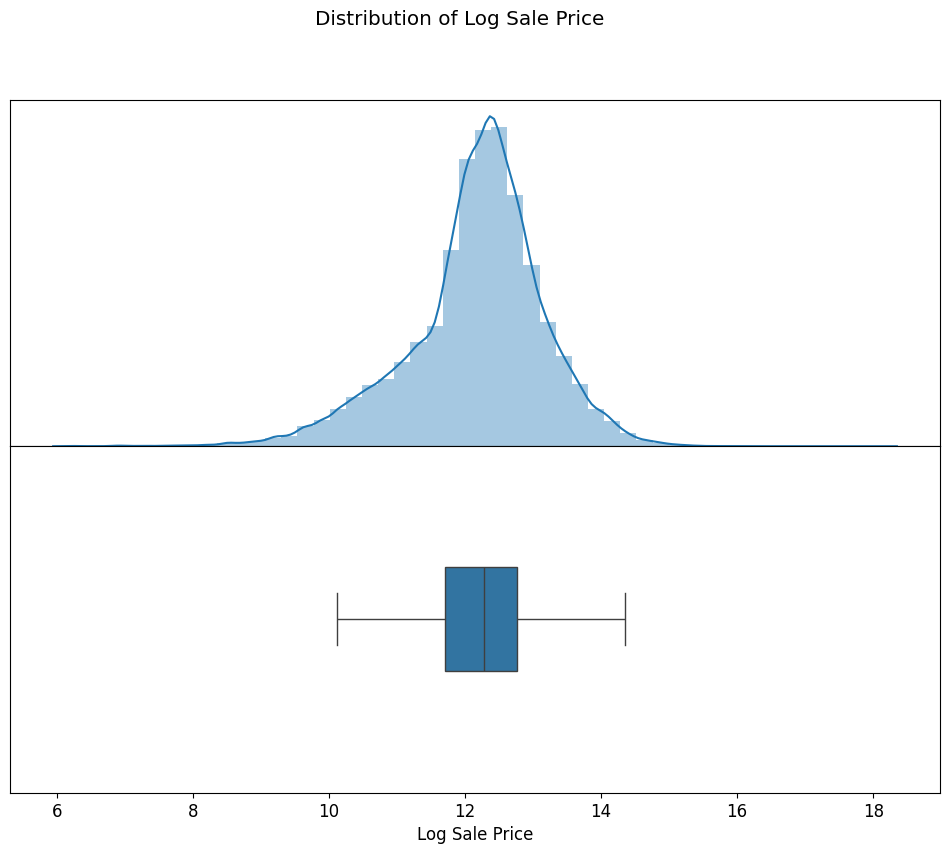

In [12]:
training_data = initial_data[initial_data['Sale Price'] >= 500]
training_data['Log Sale Price'] = np.log(initial_data['Sale Price'])

plot_distribution(training_data, label='Log Sale Price');

<br><br>

---
## Question 3a


Is the following statement correct? Assign your answer to `q3statement`.

     "At least 25% of the properties in the training set sold for more than $200,000.00."

**Note:** The provided test for this question does not confirm that you have answered correctly; only that you have assigned `q3statement` to `True` or `False`.

In [13]:
print(training_data[training_data['Sale Price'] > 200000].shape[0] >= training_data.shape[0] / 4)

# This should be set to True or False
q3statement = True

True


<br><br>

---
## Question 3b

Next, we want to explore if there is any correlation between `Log Sale Price` and the total area occupied by the property. The `codebook.txt` file tells us the column `Building Square Feet` should do the trick — it measures "(from the exterior) the total area, in square feet, occupied by the building".

Let's also apply a log transformation to the `Building Square Feet` column.

In the following cell, create a new column `Log Building Square Feet` in our `training_data` that contains the log-transformed area occupied by each property. 

**You should NOT remove or modify the original `Building Square Feet` column as it will be used for later questions**. If you accidentally remove it, just restart your kernel and run the cells again.

*To ensure that any errors from this part do not propagate to later questions, there will be no hidden tests for this question.*

In [14]:
training_data['Log Building Square Feet'] = np.log(training_data['Building Square Feet'])

<!-- BEGIN QUESTION -->

<br><br>

---
## Question 3c

In the visualization below, we created a `jointplot` with `Log Building Square Feet` on the x-axis, and `Log Sale Price` on the y-axis. In addition, we fit a simple linear regression line through the bivariate scatter plot in the middle.

Based on the following plot, would `Log Building Square Feet` make a good candidate as one of the features for our model? Why or why not?

**Hint:** To help answer this question, ask yourself: what kind of relationship does a “good” feature share with the target variable we aim to predict?

![Joint Plot](images/q2p3_jointplot.png)


_Yes, there is a clear linear corelation between Log Building Square Feet and Log Sale Price sugguesting that the larger buildings sell for higher prices and have higher monetary value._

<!-- END QUESTION -->

<br><br>

---
## Question 4

Continuing from the previous part, as you explore the dataset, you might still run into more outliers that prevent you from creating a clear visualization or capturing the trend of the majority of the houses. 

Write a function `remove_outliers` that removes outliers from the dataset based on a threshold value of a variable. For example, `remove_outliers(training_data, 'Building Square Feet', lower=500, upper=8000)` should return a copy of `data` with only observations that satisfy `Building Square Feet` less than or equal to 8000 (inclusive) and `Building Square Feet` greater than 500 (inclusive).

**Note:** The provided tests simply check that the `remove_outliers` function you defined does not mutate the input data in-place. They do not check that you have implemented `remove_outliers` correctly so that it works with any data, variable, lower, and upper bound.

In [15]:
def remove_outliers(data, variable, lower=-np.inf, upper=np.inf):
    """
    Input:
      data (DataFrame): the table to be filtered
      variable (string): the column with numerical outliers
      lower (numeric): observations with values lower than or equal to this will be removed
      upper (numeric): observations with values higher than or equal to this will be removed
    
    Output:
      a DataFrame with outliers removed
      
    Note: This function should not change mutate the contents of data.
    """

    return data[(lower <= data[variable]) & (data[variable] <= upper)]

<br/><br/>
<hr style="border: 1px solid #fdb515;" />

# Part 3: Feature Engineering

In this section, we will walk you through a few feature engineering techniques. 

### Bedrooms

Let's start simple by extracting the total number of bedrooms as our first feature for the model. You may notice that the `Bedrooms` column doesn't actually exist in the original `DataFrame`! Instead, it is part of the `Description` column.

<br><br>

---
## Question 5a

Let's take a closer look at the `Description` column first. Compare the description for a few rows. For the following list of variables, how many of them can be extracted from the `Description` column? Assign your answer to a list of integers corresponding to the statements that you think are true (ie. `[1, 2, 3]`).

1. The date the property was sold on.
2. The number of stories the property contains.
3. The previous owner of the property.
4. The address of the property.
5. The number of garages the property has.
6. The total number of rooms inside the property.
7. The total number of bedrooms inside the property.
8. The total number of bathrooms inside the property.

In [16]:
#AI used to find how to get non-truncated display
pd.set_option('display.max_colwidth', None)
training_data['Description'].head()

q5a = [1, 2, 4, 6, 7, 8]

<br><br>

---
## Question 5b

Write a function `add_total_bedrooms(data)` that returns a copy of `data` with an additional column called `Bedrooms` that contains the total number of bedrooms (**as integers**) for each house. Treat missing values as zeros, if necessary. Remember that you can make use of vectorized code here; you shouldn't need any `for` statements. 

**Hint**: You should consider inspecting the `Description` column to figure out if there is any general structure within the text. Once you have noticed a certain pattern, you are set with the power of RegEx!

In [17]:
def add_total_bedrooms(data):
    """
    Input:
      data (DataFrame): a DataFrame containing at least the Description column.

    Output:
      a Dataframe with a new column "Bedrooms" containing ints.

    """
    with_rooms = data.copy()
    
    with_rooms['Bedrooms'] = with_rooms['Description'].str.extract(r'([\d]+) of which are bedrooms').astype(int)
    with_rooms['Bedrooms'] = with_rooms['Bedrooms'].fillna(0)

    return with_rooms

training_data = add_total_bedrooms(training_data)

<!-- BEGIN QUESTION -->

<br><br>

---
## Question 5c

Create a visualization that clearly and succinctly shows if there exists an association between  `Bedrooms` and `Log Sale Price`. A good visualization should satisfy the following requirements:
- It should avoid overplotting.
- It should have clearly labeled axes and a succinct title.
- It should convey the strength of the correlation between `Sale Price` and the number of rooms: in other words, you should be able to look at the plot and describe the general relationship between `Log Sale Price` and `Bedrooms`.

**Hint**: A direct scatter plot of the `Sale Price` against the number of rooms for all of the households in our training data might risk overplotting.

Text(0, 0.5, 'Log Sale Price')

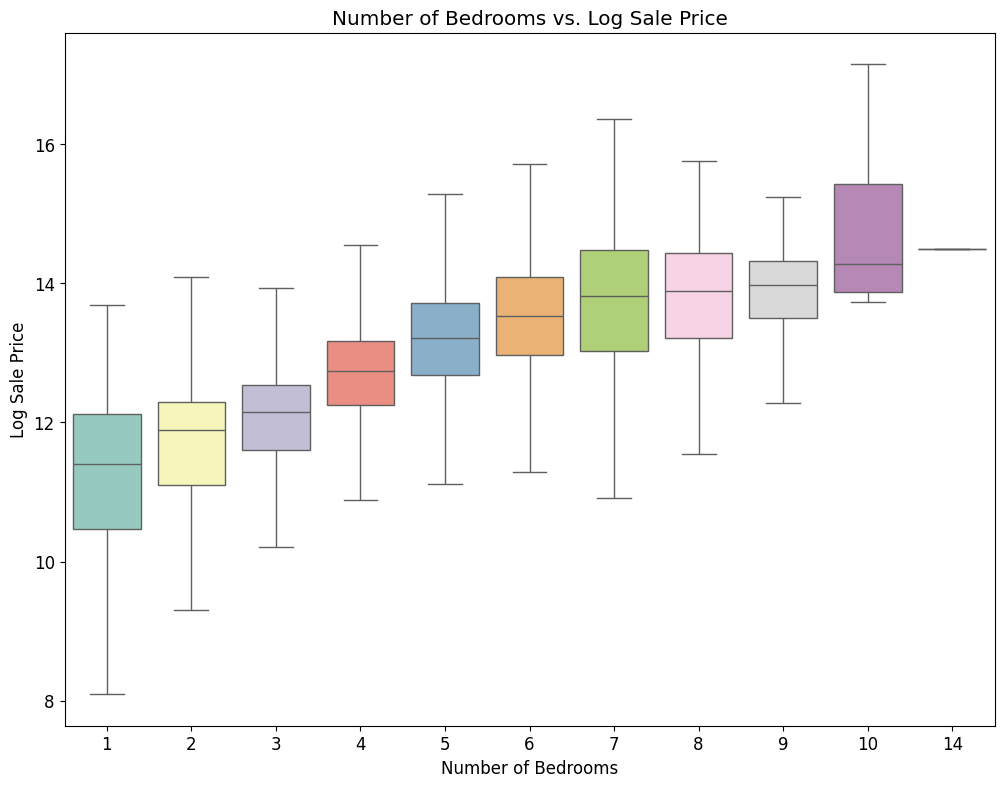

In [18]:

sns.boxplot(training_data, x = 'Bedrooms', y = 'Log Sale Price', showfliers = False, palette='Set3')

plt.title("Number of Bedrooms vs. Log Sale Price")
plt.xlabel('Number of Bedrooms')
plt.ylabel('Log Sale Price')


<!-- END QUESTION -->

Now, let's take a look at the relationship between neighborhood and sale prices of the houses in our dataset.
Notice that currently we don't have the actual names for the neighborhoods. Instead we will use a similar column, `Neighborhood Code` (which is a numerical encoding of the actual neighborhoods by the Assessment office).

<br><br>

---
## Question 6a

Before creating any visualization, let's quickly inspect how many different neighborhoods we are dealing with.

Assign the variable `num_neighborhoods` to the total number of **unique** neighborhoods in `data`. 


In [19]:
num_neighborhoods = len(training_data['Neighborhood Code'].unique())
num_neighborhoods

193

<br><br>

---
## Question 6b

If we try directly plotting the distribution of `Log Sale Price` for all of the households in each neighborhood using the `plot_categorical` function from the next cell, we get the following visualization.


![overplot](images/q5p2_catplot.png)


In [20]:
# Feel free to create a cell below this and run plot_cateogrical(training_data) if you want to see what this function outputs.
def plot_categorical(neighborhoods):
    fig, axs = plt.subplots(nrows=2)

    sns.boxplot(
        x='Neighborhood Code',
        y='Log Sale Price',
        data=neighborhoods,
        ax=axs[0],
    )

    sns.countplot(
        x='Neighborhood Code',
        data=neighborhoods,
        ax=axs[1],
    )

    # Draw median price
    axs[0].axhline(
        y=training_data['Log Sale Price'].median(), 
        color='red',
        linestyle='dotted'
    )

    # Label the bars with counts
    for patch in axs[1].patches:
        x = patch.get_bbox().get_points()[:, 0]
        y = patch.get_bbox().get_points()[1, 1]
        axs[1].annotate(f'{int(y)}', (x.mean(), y), ha='center', va='bottom')

    # Format x-axes
    axs[1].set_xticklabels(axs[1].xaxis.get_majorticklabels(), rotation=90)
    axs[0].xaxis.set_visible(False)

    # Narrow the gap between the plots
    plt.subplots_adjust(hspace=0.01)

Oh no, looks like we have run into the problem of overplotting again! 

You might have noticed that the graph is overplotted because **there are actually quite a few neighborhoods in our dataset**! For the clarity of our visualization, we will have to zoom in again on a few of them. The reason for this is our visualization will become quite cluttered with a super dense x-axis.

Assign the variable `in_top_20_neighborhoods` to a copy of `training_data` that has been filtered to only contain rows corresponding to properties that are in one of the top 20 most populous neighborhoods. We define the top 20 neighborhoods as being the 20 neighborhood codes that have the greatest number of properties within them.

In [21]:
top_20_neighborhood_codes = training_data.groupby('Neighborhood Code')['Neighborhood Code'].count().sort_values(ascending=False).head(20).index
in_top_20_neighborhoods = training_data[training_data['Neighborhood Code'].isin(top_20_neighborhood_codes)]

Let's create another of the distribution of sale price within in each neighborhood again, but this time with a narrower focus!

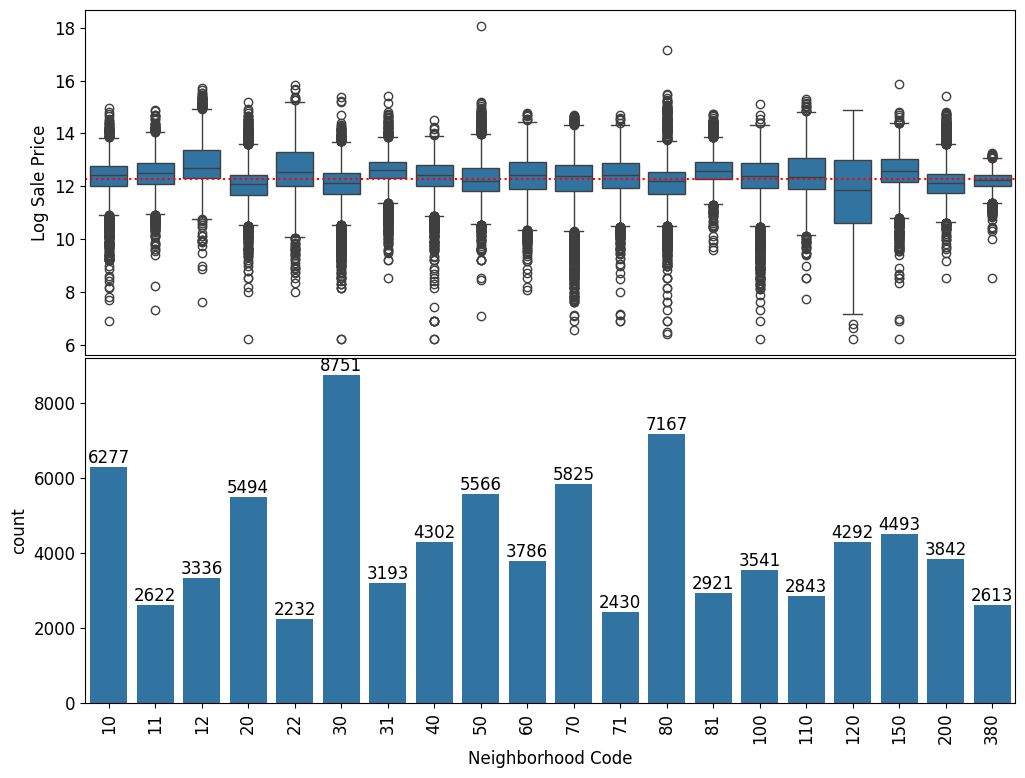

In [22]:
plot_categorical(neighborhoods=in_top_20_neighborhoods)

<br><br>

---
## Question 6c

From the plot above, we can see that there is much less data available for some neighborhoods. For example, Neighborhood 71 has only around 27% of the number of datapoints as Neighborhood 30.

One way we can deal with the lack of data from some neighborhoods is to create a new feature that bins neighborhoods together. We’ll categorize our neighborhoods in a crude way. In this question, we’ll compute how “expensive” each neighborhood is by aggregating the `Log Sale Price`s for all properties in a particular neighborhood using a `metric`, such as the median. We’ll use this `metric` to find the top `n` most expensive neighborhoods. Then, in `q6d`, we’ll label these “expensive neighborhoods” and leave all other neighborhoods unmarked.

Fill in `find_expensive_neighborhoods` to return a **list** of the neighborhood codes of the **top `n`** most expensive neighborhoods as measured by our choice of aggregating function, `metric`.

For example, calling `find_expensive_neighborhoods(training_data, n=3, metric=np.median)` should return the 3 neighborhood codes with the highest median `Log Sale Price` computed across all properties in those neighborhood codes. 

In [23]:
def find_expensive_neighborhoods(data, n=3, metric=np.median):
    """
    Input:
      data (DataFrame): should contain at least an int-valued 'Neighborhood Code'
        and a numeric 'Log Sale Price' column
      n (int): the number of top values desired
      metric (function): function used for aggregating the data in each neighborhood.
        for example, np.median for median prices
    
    Output:
      a list of the the neighborhood codes of the top n highest-priced neighborhoods 
      as measured by the metric function
    """
    neighborhoods = data.groupby('Neighborhood Code')['Log Sale Price'].agg(metric).sort_values(ascending=False).head(n).index
    
    # This makes sure the final list contains the generic int type used in Python3, not specific ones used in NumPy.
    return [int(code) for code in neighborhoods]

expensive_neighborhoods = find_expensive_neighborhoods(training_data, 3, np.median)
expensive_neighborhoods

[44, 94, 93]

<br><br>

---
## Question 6d

We now have a list of neighborhoods we've deemed as higher-priced than others.  Let's use that information to write an additional function `add_expensive_neighborhood` that takes in a `DataFrame` of housing data (`data`) and a list of neighborhood codes considered to be expensive (`expensive_neighborhoods`). You can think of `expensive_neighborhoods` as being the output of the function `find_expensive_neighborhoods` from `q6c`. 

Using these inputs, `add_expensive_neighborhood` should add a column to `data` named `in_expensive_neighborhood` that takes on the **integer** value of 1 if a property is part of a neighborhood in `expensive_neighborhoods` and the integer value of 0 if it is not. This type of variable is known as an **indicator variable**.

**Hint:** `pd.Series.astype` [(documentation)](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.Series.astype.html) may be useful for converting `True`/`False` values to integers.

In [24]:
def add_in_expensive_neighborhood(data, expensive_neighborhoods):
    """
    Input:
      data (DataFrame): a DataFrame containing a 'Neighborhood Code' column with values
        found in the codebook
      expensive_neighborhoods (list of ints): ints should be the neighborhood codes of
        neighborhoods pre-identified as expensive
    Output:
      DataFrame identical to the input with the addition of a binary
      in_expensive_neighborhood column
    """
    data['in_expensive_neighborhood'] = data['Neighborhood Code'].isin(expensive_neighborhoods).astype(int)
    return data

expensive_neighborhoods = find_expensive_neighborhoods(training_data, 3, np.median)
training_data = add_in_expensive_neighborhood(training_data, expensive_neighborhoods)

In the following question, we will take a closer look at the `Roof Material` feature of the dataset and examine how we can incorporate categorical features into our linear model.

<br><br>

---
## Question 7a

If we look at `codebook.txt` carefully, we can see that the Assessor's Office uses the following mapping for the numerical values in the `Roof Material` column.
```
Roof Material (Nominal): 

       1    Shingle/Asphalt
       2    Tar & Gravel
       3    Slate
       4    Shake
       5    Tile
       6    Other
```

Write a function `substitute_roof_material` that replaces each numerical value in `Roof Material` with their corresponding roof material. Your function should return a new `DataFrame`, not modify the existing `DataFrame`. If you modify the existing `DataFrame` by accident, you can load `training_data` again in `q2b`.

**Hint**: the `DataFrame.replace` ([documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.replace.html)) method may be useful here.

In [25]:
def substitute_roof_material(data):
    """
    Input:
      data (DataFrame): a DataFrame containing a 'Roof Material' column.  Its values
                         should be limited to those found in the codebook
    Output:
      new DataFrame identical to the input except with a refactored 'Roof Material' column
    """
    
    new_data = data.copy()
    new_data['Roof Material'] = new_data['Roof Material'].replace({
                                  1: 'Shingle/Asphalt',
                                  2: 'Tar & Gravel',
                                  3: 'Slate',
                                  4: 'Shake',
                                  5: 'Tile',
                                  6: 'Other', })

    return new_data
    
training_data_mapped = substitute_roof_material(training_data)
training_data_mapped.head()

,PIN,Property Class,Neighborhood Code,Land Square Feet,Town Code,Apartments,Wall Material,Roof Material,Basement,Basement Finish,...,Pure Market Filter,Garage Indicator,Neigborhood Code (mapping),Town and Neighborhood,Description,Lot Size,Log Sale Price,Log Building Square Feet,Bedrooms,in_expensive_neighborhood
1,13272240180000,202,120,3780.0,71,0.0,2.0,Shingle/Asphalt,1.0,1.0,...,1,1.0,120,71120,"This property, sold on 05/23/2018, is a one-story houeshold located at 2844 N LOWELL AVE.It has a total of 6 rooms, 3 of which are bedrooms, and 1.0 of which are bathrooms.",3780.0,12.560244,6.904751,3,0
2,25221150230000,202,210,4375.0,70,0.0,2.0,Shingle/Asphalt,2.0,3.0,...,1,1.0,210,70210,"This property, sold on 02/18/2016, is a one-story houeshold located at 11415 S PRAIRIE AVE.It has a total of 7 rooms, 3 of which are bedrooms, and 1.0 of which are bathrooms.",4375.0,9.998798,6.810142,3,0
3,10251130030000,203,220,4375.0,17,0.0,3.0,Shingle/Asphalt,1.0,3.0,...,1,1.0,220,17220,"This property, sold on 07/23/2013, is a one-story with partially livable attics houeshold located at 2012 DOBSON ST.It has a total of 5 rooms, 3 of which are bedrooms, and 1.5 of which are bathrooms.",4375.0,12.323856,7.068172,3,0
4,31361040550000,202,120,8400.0,32,0.0,3.0,Shingle/Asphalt,2.0,3.0,...,1,1.0,120,32120,"This property, sold on 06/10/2016, is a one-story houeshold located at 104 SAUK TRL.It has a total of 5 rooms, 2 of which are bedrooms, and 1.0 of which are bathrooms.",8400.0,10.025705,6.855409,2,0
6,30314240080000,203,181,10890.0,37,0.0,1.0,Shingle/Asphalt,1.0,3.0,...,1,1.0,181,37181,"This property, sold on 10/26/2017, is a one-story with partially livable attics houeshold located at 2820 186TH ST.It has a total of 6 rooms, 4 of which are bedrooms, and 1.5 of which are bathrooms.",10890.0,11.512925,7.458186,4,0


<br><br>

---
## Question 7b

#### An Important Note on One-Hot-Encoding 

Unfortunately, simply replacing the integers with the appropriate strings isn’t sufficient for using `Roof Material` in our model.  Since `Roof Material` is a categorical variable, we will have to one-hot-encode the data. 

Complete the following function `ohe_roof_material` that returns a `DataFrame` with the new column one-hot-encoded on the roof material of the household. These new columns should have the form `Roof Material_MATERIAL`. Your function should return a new `DataFrame` and **should not modify the existing `DataFrame`**.

You should use `scikit-learn`’s `OneHotEncoder` to perform the one-hot-encoding. `OneHotEncoder` will automatically generate column names of the form `Roof Material_MATERIAL`. Unlike in the lab example however, in this problem we only wish to construct the one-hot-encoding columns **without removing any columns**.

In [26]:
from sklearn.preprocessing import OneHotEncoder

def ohe_roof_material(data):
    """
    One-hot-encodes roof material. New columns are of the form "Roof Material_MATERIAL".
    """
    encoder = OneHotEncoder(sparse_output=False, drop=None)
    new_data = data.copy()
    encoded_list = encoder.fit_transform(new_data[['Roof Material']])
    encoded_df = pd.DataFrame(encoded_list, columns=encoder.get_feature_names_out(['Roof Material']), index=new_data.index)

    return pd.concat([new_data, encoded_df], axis=1)


training_data_ohe = ohe_roof_material(training_data_mapped)
# This line of code will display only the one-hot-encoded columns in training_data_ohe that 
# have names that begin with “Roof Material_" 
training_data_mapped['Roof Material'].head(10)
training_data_ohe.filter(regex='^Roof Material_').head(10)

,Roof Material_Other,Roof Material_Shake,Roof Material_Shingle/Asphalt,Roof Material_Slate,Roof Material_Tar & Gravel,Roof Material_Tile
1,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0
6,0.0,0.0,1.0,0.0,0.0,0.0
7,0.0,0.0,1.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,1.0,0.0
9,0.0,0.0,1.0,0.0,0.0,0.0
10,0.0,0.0,1.0,0.0,0.0,0.0
11,0.0,0.0,1.0,0.0,0.0,0.0


<!-- END QUESTION -->

<br>

<hr style="border: 1px solid #fdb515;" />

## Question 8: Preparing Data


Let's split the dataset into a training set and a validation set. We will use the training set to fit our model's parameters and the validation set to evaluate how well our model will perform on unseen data drawn from the same distribution. 

In the cell below, complete the function `train_val_split` that splits `data` into two smaller `DataFrame`s named `train` and `validation`. Let `train` contain 80% of the data, and let `validation` contain the remaining 20%. **You should not import any additional libraries for this question.** 

You should only use `NumPy` functions to generate randomness! Your answer should use the variable `shuffled_indices` defined for you. Take a look at the [documentation](https://numpy.org/doc/stable/reference/random/generated/numpy.random.permutation.html) for `np.permutation` to better understand what `shuffled_indices` contains.

**Hint:** While there are multiple solutions, one way is to create two `NumPy` arrays named `train_indices` and `validation_indices` (or any variable names of your choice) that contain a *random* 80% and 20% of the indices, respectively. Then, use these arrays to index into `data` to create your final `train` and `validation` `DataFrame`s. To ensure that your code matches the solution, use the first 80% as the training set and the last 20% as the validation set. Remember, the values you use to partition `data` must be integers!


In [27]:
# This makes the train-validation split in this section reproducible across different runs 
# of the notebook. You do not need this line to run train_val_split in general.

# DO NOT CHANGE THIS LINE
np.random.seed(1337)
# DO NOT CHANGE THIS LINE

def train_val_split(data):
    """ 
    Takes in a DataFrame `data` and randomly splits it into two smaller DataFrames 
    named `train` and `validation` with 80% and 20% of the data, respectively. 
    """
    
    data_len = data.shape[0]
    shuffled_indices = np.random.permutation(data_len)
    
    split80 = int(data_len * 8 / 10)
    train_indices = shuffled_indices[:split80]
    validation_indices = shuffled_indices[split80:]

    train = data.iloc[train_indices, :]
    validation = data.iloc[validation_indices, :]
   
    return train, validation
train, validation = train_val_split(training_data)

<br>

<hr style="border: 1px solid #fdb515;" />

## Question 9: Fitting a Simple Model

Let's fit our linear regression model using the ordinary least squares estimator! We will start with something simple by using only two features: the **number of bedrooms** in the household and the **log-transformed total area covered by the building** (in square feet). 

Consider the following expression for our first linear model that contains one of the features:

$$
\text{Log Sale Price} = \theta_0 + \theta_1 \cdot (\text{Bedrooms})
$$

In parallel, we will also consider a second model that contains both features:

$$
\text{Log Sale Price} = \theta_0 + \theta_1 \cdot (\text{Bedrooms}) + \theta_2 \cdot (\text{Log Building Square Feet})
$$

<br>

--- 

## Question 9a

**Without running any calculation or code**, assign `q9a` to be the comparator ('>=', '=', '<=') that fills the blank in the following statement:

We quantify the loss on our linear models using MSE (Mean Squared Error). Consider the training loss of the first model and the training loss of the second model. We are guaranteed that:

$$
\text{Training Loss of the 1st Model} ~~  \_\_\_\_ ~~ \text{Training Loss of the 2nd Model}
$$

In [28]:
q9a = ">="

<br>

### Pipeline Function

You wrote a few functions that added features to the dataset. Instead of calling them manually one by one each time, it is best practice to encapsulate all of this feature engineering into one "**pipeline**" function. Defining and using a pipeline reduces all the feature engineering to just one function call and ensures that the same transformations are applied to all data.  Below, we combined some functions into a single helper function that outputs `X` and `Y` for the first model above. Try to understand what this function does! 

We have provided the "log_transform" function for you, for the rest of the functions, use what you have implemented in the previous questions.




In [29]:
def log_transform(data, col):

    data['Log '+col] = np.log(data[col])

    return data 


#######################################################




def feature_engine_simple(data):
    # Remove outliers
    data = remove_outliers(data, 'Sale Price', lower=500)
    # Create Log Sale Price column
    data = log_transform(data, 'Sale Price')
    # Create Bedroom column
    data = add_total_bedrooms(data)
    # Select X and Y from the full data
    X = data[['Bedrooms']]
    Y = data['Log Sale Price']
    return X, Y

# Reload the data
full_data = pd.read_csv("cook_county_train.csv")

# Process the data using the pipeline for the first model.
np.random.seed(1337)
train_m1, valid_m1 = train_val_split(full_data)
X_train_m1_simple, Y_train_m1_simple = feature_engine_simple(train_m1)
X_valid_m1_simple, Y_valid_m1_simple = feature_engine_simple(valid_m1)

# Take a look at the result
display(X_train_m1_simple.head())
display(Y_train_m1_simple.head())

,Bedrooms
130829,4
193890,2
30507,2
91308,2
131132,3


130829    12.994530
193890    11.848683
30507     11.813030
91308     13.060488
131132    12.516861
Name: Log Sale Price, dtype: float64

### `.pipe`

Alternatively, we can build the pipeline using `pd.DataFrame.pipe` ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pipe.html)). Take a look at our use of `pd.DataFrame.pipe` below. 

The following function `feature_engine_pipe` takes in a `DataFrame` `data`, a list `pipeline_functions` containing 3-element tuples `(function, arguments, keyword_arguments)` that will be called on `data` in the pipeline, and the label `prediction_col` that represents the column of our target variable (`Sale Price` in this case). You can use this function with each of the tuples passed in through `pipeline_functions`.

In [30]:
# Run this cell to define feature_engine_pipe; no further action is needed.
def feature_engine_pipe(data, pipeline_functions, prediction_col):
    """Process the data for a guided model."""
    for function, arguments, keyword_arguments in pipeline_functions:
        if keyword_arguments and (not arguments):
            data = data.pipe(function, **keyword_arguments)
        elif (not keyword_arguments) and (arguments):
            data = data.pipe(function, *arguments)
        else:
            data = data.pipe(function)
    X = data.drop(columns=[prediction_col])
    Y = data.loc[:, prediction_col]
    return X, Y

<br>

--- 

## Question 9b

It is time to prepare the training and validation data for the two models we proposed above. Use the following two cells to reload a fresh dataset from scratch and run them through the following preprocessing steps using `feature_engine_pipe` for each model:

- Perform a `train_val_split` on the original dataset, loaded as the `DataFrame` `full_data`. Let 80% of the set be training data, and 20% of the set be validation data. 
- For both the training and validation set,
    1. Remove outliers in `Sale Price` so that we consider households with a price that is greater than 499 dollars (or equivalently, a price that is 500 dollars or greater). 
    2. Apply log transformations to the `Sale Price` and the `Building Square Feet` columns to create two new columns, `Log Sale Price` and `Log Building Square Feet`.
    3. Extract the total number of bedrooms into a new column `Bedrooms` from the `Description` column.
    4. Select the columns `Log Sale Price` and `Bedrooms` (and `Log Building Square Feet` if this is the second model). We have implemented the helper function `select_columns` for you.
    5. Return the design matrix $\mathbb{X}$ and the observed vector $\mathbb{Y}$. Note that $\mathbb{Y}$ refers to the transformed `Log Sale Price`, not the original `Sale Price`. **Your design matrix and observed vector should be `NumPy` arrays or `pandas` `DataFrame`s**.

Assign the final training data and validation data for both models to the following set of variables:

- First Model: `X_train_m1`, `Y_train_m1`, `X_valid_m1`, `Y_valid_m1`. This is already implemented for you. 
- Second Model: `X_train_m2`, `Y_train_m2`, `X_valid_m2`, `Y_valid_m2`. Please implement this in the second cell below. You may use the first model as an example.

For an example of how to work with pipelines, we have processed model 1 for you using `m1_pipelines` by passing in the corresponding pipeline functions as a list of tuples in the below cell. Your task is to do the same for model 2 in the cell after —— that is, save your pipeline functions as a list of tuples and assign it to `m2_pipelines` for model 2.

As a refresher, the equations model 1 and model 2, respectively, are:
$$
\text{Log Sale Price} = \theta_0 + \theta_1 \cdot (\text{Bedrooms})
$$


$$
\text{Log Sale Price} = \theta_0 + \theta_1 \cdot (\text{Bedrooms}) + \theta_2 \cdot (\text{Log Building Square Feet})
$$

**Note**: Do not change the line `np.random.seed(1337)` as it ensures we are partitioning the dataset the same way for both models (otherwise, their performance isn't directly comparable).

In [31]:
# Reload the data
full_data = pd.read_csv("cook_county_train.csv")

# Apply feature engineering to the data using the pipeline for the first model
np.random.seed(1337)
train_m1, valid_m1 = train_val_split(full_data)

# Helper function
def select_columns(data, *columns):
    """Select only columns passed as arguments."""
    return data.loc[:, columns]

# Pipelines, a list of tuples
m1_pipelines = [
    (remove_outliers, None, {
        'variable': 'Sale Price',
        'lower': 500,
    }),
    (log_transform, None, {'col': 'Sale Price'}),
    (add_total_bedrooms, None, None),
    (select_columns, ['Log Sale Price', 'Bedrooms'], None)
]

X_train_m1, Y_train_m1 = feature_engine_pipe(train_m1, m1_pipelines, 'Log Sale Price')
X_valid_m1, Y_valid_m1 = feature_engine_pipe(valid_m1, m1_pipelines, 'Log Sale Price')

# Take a look at the result
# It should be the same above as the result returned by feature_engine_simple
display(X_train_m1.head())
display(Y_train_m1.head())

,Bedrooms
130829,4
193890,2
30507,2
91308,2
131132,3


130829    12.994530
193890    11.848683
30507     11.813030
91308     13.060488
131132    12.516861
Name: Log Sale Price, dtype: float64

In [32]:
# DO NOT CHANGE THIS LINE
np.random.seed(1337)
# DO NOT CHANGE THIS LINE

# Process the data using the pipeline for the second model
train_m2, valid_m2 = train_val_split(full_data)

m2_pipelines = [
    (remove_outliers, None, {
        'variable': 'Sale Price',
        'lower': 500,
    }),
    (log_transform, None, {'col': 'Sale Price'}),
    (log_transform, None, {'col': 'Building Square Feet'}),
    (add_total_bedrooms, None, None),
    (select_columns, ['Log Sale Price', 'Bedrooms', 'Log Building Square Feet'], None)
]

X_train_m2, Y_train_m2 =  feature_engine_pipe(train_m2, m2_pipelines, 'Log Sale Price')
X_valid_m2, Y_valid_m2 =  feature_engine_pipe(valid_m2, m2_pipelines, 'Log Sale Price')


# Take a look at the result
display(X_train_m2.head())
display(Y_train_m2.head())

,Bedrooms,Log Building Square Feet
130829,4,7.870166
193890,2,7.002156
30507,2,6.851185
91308,2,7.228388
131132,3,7.990915


130829    12.994530
193890    11.848683
30507     11.813030
91308     13.060488
131132    12.516861
Name: Log Sale Price, dtype: float64

<br>

--- 

## Question 9c

Finally, let's do some regression!

We first initialize a `sklearn.linear_model.LinearRegression` object [(documentation)](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) for both of our models. We set the `fit_intercept = True` to ensure that the linear model has a non-zero intercept (i.e., a bias term).

In [33]:

import sklearn.linear_model as lm
linear_model_m1 = lm.LinearRegression(fit_intercept=True)
linear_model_m2 = lm.LinearRegression(fit_intercept=True)

Now it's time to fit our linear regression model. Use the cell below to fit both models and then use it to compute the fitted values of `Log Sale Price` over the training data and the predicted values of `Log Sale Price` for the validation data.

Assign the predicted values from both of your models on the training and validation set to the following variables:

- First Model: predicted values on **training set**: `Y_fitted_m1`, predicted values on **validation set**: `Y_predicted_m1`
- Second Model: predicted values on **training set**: `Y_fitted_m2`, predicted values on **validation set**: `Y_predicted_m2`



In [34]:
linear_model_m1.fit(X_train_m1, Y_train_m1)
# Compute the fitted and predicted values of Log Sale Price for 1st model
Y_fitted_m1 = linear_model_m1.predict(X_train_m1)
Y_predicted_m1 = linear_model_m1.predict(X_valid_m1)

# Fit the 2nd model
linear_model_m2.fit(X_train_m2, Y_train_m2)
# Compute the fitted and predicted values of Log Sale Price for 2nd model
Y_fitted_m2 = linear_model_m2.predict(X_train_m2)
Y_predicted_m2 = linear_model_m2.predict(X_valid_m2)

<br>

<hr style="border: 1px solid #fdb515;" />

## Question 10: Evaluate Our Simple Model

<br>

--- 

Let's now move into the analysis of our two models!

In [35]:
def rmse(predicted, actual):
    """
    Calculates RMSE from actual and predicted values.
    Input:
      predicted (1D array): Vector of predicted/fitted values
      actual (1D array): Vector of actual values
    Output:
      A float, the RMSE value.
    """
    return np.sqrt(np.mean((actual - predicted)**2))

<!-- BEGIN QUESTION -->

<br>

--- 

## Question 10a

One way of understanding a model's performance (and appropriateness) is through a plot of the residuals versus the observations.

In the cell below, use `plt.scatter` [(documentation)](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) to plot the residuals from predicting `Log Sale Price` using **only the second model** against the original `Log Sale Price` for the **validation data**. With such a large dataset, it is difficult to avoid overplotting entirely. You should also **ensure that the dot size and opacity in the scatter plot are set appropriately** to reduce the impact of overplotting as much as possible.

Text(0, 0.5, 'Residual (Actual - Predicted)')

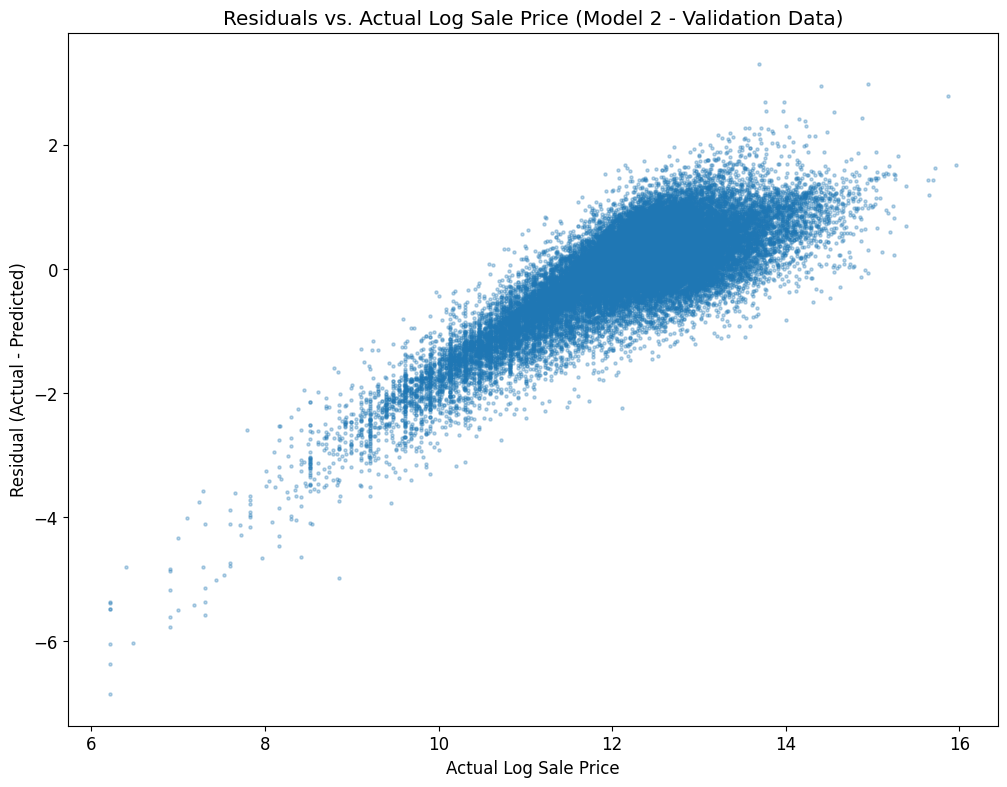

In [36]:
residual = Y_valid_m2 - Y_predicted_m2
plt.scatter(Y_valid_m2, residual, s=5, alpha=0.3)

plt.title("Residuals vs. Actual Log Sale Price (Model 2 - Validation Data)")
plt.xlabel("Actual Log Sale Price")
plt.ylabel("Residual (Actual - Predicted)")

While our simple model explains some of the variability in price, there is certainly still a lot of room for improvement —— one reason is we have been only utilizing 1 or 2 features (out of a total of 70+) so far! Can you engineer and incorporate more features to improve the model's fairness and accuracy? We won't be asking you to provide your answers here, but this will be important going into the next part of this project.

<br>

<hr style="border: 1px solid #fdb515;" />

# Question 11

It is time to build your own model!

You will conduct feature engineering on your training data using the `feature_engine_final` function, fit the model with this training data, and compute the training Root Mean Squared Error (RMSE). Then, we will process our test data with `feature_engine_final`, use the model to predict `Log Sale Price` for the test data, transform the predicted and original log values back into their original forms (by using `delog`), and compute the test RMSE.

Note your `feature_engine_final` can contain any function you have created before and any new function that you wish to explore. 

Your goal in Question 11 is to:

* Define a function to perform feature engineering and produce a design matrix for modeling.
* Apply this feature engineering function to the training data and use it to train a model that can predict the `Log Sale Price` of houses.
* Use this trained model to predict the `Log Sale Price`s of the test set. Remember that our test set does not contain the true `Sale Price` of each house –— your model is trying to guess them! 
* Submit your predicted `Log Sale Price`s on the test set.

### Grading Scheme

Your grade for the project will be based on your test RMSE and your ipynb. The breakdown are as follows:

1. Completeness of your ipynb(20 pts)

2. 
Points | 30 | 25 | 20 | 15
--- | --- | --- | --- | ---
Test RMSE | Top 20% | (20%, 40%] | (40%, 70%] | Last 30%



In [37]:
## INIT CELL

training_val_data = pd.read_csv("cook_county_train.csv", index_col='Unnamed: 0')

test_data = pd.read_csv("cook_county_test.csv")

training_val_data = remove_outliers(training_val_data, 'Sale Price', lower=500)
training_val_data = log_transform(training_val_data, 'Sale Price')

pd.set_option('display.max_columns', None)
display(training_val_data.head(1))
display(test_data.head(1))

,PIN,Property Class,Neighborhood Code,Land Square Feet,Town Code,Apartments,Wall Material,Roof Material,Basement,Basement Finish,Central Heating,Other Heating,Central Air,Fireplaces,Attic Type,Attic Finish,Design Plan,Cathedral Ceiling,Construction Quality,Site Desirability,Garage 1 Size,Garage 1 Material,Garage 1 Attachment,Garage 1 Area,Garage 2 Size,Garage 2 Material,Garage 2 Attachment,Garage 2 Area,Porch,Other Improvements,Building Square Feet,Repair Condition,Multi Code,Number of Commercial Units,Estimate (Land),Estimate (Building),Deed No.,Sale Price,Longitude,Latitude,Census Tract,Multi Property Indicator,Modeling Group,Age,Use,O'Hare Noise,Floodplain,Road Proximity,Sale Year,Sale Quarter,Sale Half-Year,Sale Quarter of Year,Sale Month of Year,Sale Half of Year,Most Recent Sale,Age Decade,Pure Market Filter,Garage Indicator,Neigborhood Code (mapping),Town and Neighborhood,Description,Lot Size,Log Sale Price
1,13272240180000,202,120,3780.0,71,0.0,2.0,1.0,1.0,1.0,2.0,5.0,0.0,1.0,2.0,3,0.0,0.0,2.0,2.0,2.0,1.0,2.0,2.0,7.0,0.0,0.0,0.0,1,0.0,997.0,2.0,2.0,0.0,49140,177500,1814316064,285000,-87.735966,41.933016,200100.0,0,SF,96,1,0.0,0.0,0.0,2018,86,43,2,5,1,1.0,9.6,1,1.0,120,71120,"This property, sold on 05/23/2018, is a one-story houeshold located at 2844 N LOWELL AVE.It has a total of 6 rooms, 3 of which are bedrooms, and 1.0 of which are bathrooms.",3780.0,12.560244


,Unnamed: 0,PIN,Property Class,Neighborhood Code,Land Square Feet,Town Code,Apartments,Wall Material,Roof Material,Basement,Basement Finish,Central Heating,Other Heating,Central Air,Fireplaces,Attic Type,Attic Finish,Design Plan,Cathedral Ceiling,Construction Quality,Site Desirability,Garage 1 Size,Garage 1 Material,Garage 1 Attachment,Garage 1 Area,Garage 2 Size,Garage 2 Material,Garage 2 Attachment,Garage 2 Area,Porch,Other Improvements,Building Square Feet,Repair Condition,Multi Code,Number of Commercial Units,Estimate (Land),Estimate (Building),Deed No.,Longitude,Latitude,Census Tract,Multi Property Indicator,Modeling Group,Age,Use,O'Hare Noise,Floodplain,Road Proximity,Sale Year,Sale Quarter,Sale Half-Year,Sale Quarter of Year,Sale Month of Year,Sale Half of Year,Most Recent Sale,Age Decade,Pure Market Filter,Garage Indicator,Neigborhood Code (mapping),Town and Neighborhood,Description,Lot Size
0,0,4252000820000,204,100,33898.0,25,0.0,2.0,4.0,1.0,3.0,1.0,5.0,1.0,2.0,2.0,1,2.0,0.0,1.0,2.0,4.0,2.0,1.0,1.0,7.0,0.0,0.0,0.0,3,748.0,4692.0,1.0,2.0,0.0,271180,677820,1427242015,-87.780037,42.091207,801902.0,0,SF,61,1,0.0,0.0,1.0,2014,71,36,3,9,2,1.0,6.1,1,1.0,100,25100,"This property, sold on 09/29/2014, is a one-story with partially livable attics houeshold located at 2025 WAGNER RD.It has a total of 11 rooms, 4 of which are bedrooms, and 3.5 of which are bathrooms.",33898.0


In [38]:
## HELPERS FUNCTIONS
def add_total_bathrooms(data):
    """Extract number of bathrooms from the Description column."""
    data['Bathrooms'] = data['Description'].str.extract(r'(\d+\.\d+) of which are bathrooms').astype('float')
    return data

def add_total_rooms(data):
    """Extract the total number of rooms from the Description column."""
    data['Total_rooms'] = data['Description'].str.extract(r'a total of (\d+) rooms').astype('float')
    return data

def add_in_expensive_neighborhood(data, n):
    """Flag properties that are in expensive neighborhoods."""
    expensive_neighborhoods = find_expensive_neighborhoods(data, n, np.median)
    data['in_expensive_neighborhood'] = data['Neighborhood Code'].isin(expensive_neighborhoods).astype(int)
    return data

def log_transform_estimate_land(data):
    temp = remove_outliers(data, 'Estimate (Land)', lower=1000, upper=500000)
    # temp = temp['Estimate (Land)'].fillna(temp['Estimate (Land)'].mean(), inplace=True)
    data['Log Estimate (Land)'] = np.log(temp['Estimate (Land)'])
    return data 

def remodel_garage_sizes(data):
    garage_size_map = {
        1: 1,
        2: 1.5,
        3: 2,
        4: 2.5,
        5: 3,
        6: 3.5,
        7: 0,
        8: 4,
    }

    data['Garage 1 Size'] = data['Garage 1 Size'].map(garage_size_map)
    data['Garage 2 Size'] = data['Garage 2 Size'].map(garage_size_map)
    return data

def harvestine_distance_from_chicago(lat, lng, degrees=True):
    """
    'Single-point' Haversine: Calculates the great circle distance
    between a point on Earth and Chicago lat-long coordinate
    """
    r = 6371 # Earth's radius (km). Have r = 3956 if you want miles
    
    lat = lat - 41.8832         # latitude of Chicago
    lng = lng - (-87.6324)      # longitude of Chicago

    # Convert decimal degrees to radians
    if degrees:
        lat = np.deg2rad(lat)
        lng = np.deg2rad(lng)

    # 'Single-point' Haversine formula
    a = np.sin(lat/2)**2 + np.cos(lat) * np.sin(lng/2)**2
    d = 2 * r * np.asin(np.sqrt(a)) 

    return d 

def add_stories(data):
    """
    Extract the number of stories from the 'Description' column and adds it as a new column 'Story'.
    
    Parameters:
    - data (pd.DataFrame): The input DataFrame containing the 'Description' column.
    
    Returns:
    - data (pd.DataFrame): The DataFrame with a new column 'Story'.
    """
    story_map = {
            'one': 1,
            'two': 2,
            'three': 3,
        }

    data['Story'] = data['Description'].str.extract(r'[\s]{1}(\w+)-story')
    data['Story'] = data['Story'].map(story_map)
    return data

def add_garage_size(data):
    size = 240  # Square feet per garage unit
    
    # Create masks for conditions
    garage1_condition = (data['Garage 1 Area'] == 2) & (data['Garage 1 Attachment'] == 1)
    garage2_condition = (data['Garage 2 Area'] == 2) & (data['Garage 2 Attachment'] == 1)
    
    # Calculate additional square footage
    garage1_add = size * data['Garage 1 Size'] * garage1_condition
    garage2_add = size * data['Garage 2 Size'] * garage2_condition
    
    # Update building square feet
    data['Building Square Feet'] = data['Building Square Feet'] + garage1_add + garage2_add
    
    return data

In [92]:
## FEATURE TESTING

import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import HistGradientBoostingRegressor


def expensive_neighborhoods_test(data, metric):
    """
    To pick which Neighborhood Code should be considered expensive neighbourhood
    Result:
        picked Log Sale Price > 13 to be considered expensive
    """

    return data.groupby('Neighborhood Code')['Log Sale Price'].agg(metric).sort_values(ascending=False)
     
def log_estimate_land_test(data):
    test_data = data.copy()
    test_data = remove_outliers(test_data, 'Estimate (Land)', lower=1000)
    test_data['Log Estimate (Land)'] = np.log(test_data['Estimate (Land)'])

    return test_data

def log_estimate_building_test(data):
    test_data = data.copy()
    test_data = remove_outliers(test_data, 'Estimate (Building)', lower=1000)
    test_data['Log Estimate (Building)'] = np.log(test_data['Estimate (Building)'])

    return test_data

def log_estimate_property_test(data):
    test_data = data.copy()
    test_data['Log Estimate (Property)'] = test_data['Estimate (Land)'] + test_data['Estimate (Building)']
    test_data = remove_outliers(test_data, 'Log Estimate (Property)', lower=1000)
    test_data['Log Estimate (Property)'] = np.log(test_data['Log Estimate (Property)'])

    return test_data

def distance_from_chicago_test(data):
    distance = harvestine_distance_from_chicago(data['Latitude'], data['Longitude'])

    correlation = np.corrcoef(y=data['Log Sale Price'], x=distance)[0, 1]

    plt.scatter(x=distance, y=data['Log Sale Price'], s=5, alpha=0.3)
    plt.xlabel('distance')
    plt.ylabel('log sale price')

    return correlation

def new_property_test(data):
    test_data = data.copy()
    test_data['New Property'] = (test_data['Age'] < 5).astype(int)

    return test_data

def total_garage_size_test(data):
    test_data = data.copy()
    test_data = remodel_garage_sizes(test_data)
    test_data['Total Garage Size'] = test_data['Garage 1 Size'] + test_data['Garage 2 Size']

    return test_data

def condition_test(data):
    test_data = data.copy()
    test_data['Condition'] = test_data['Age'] + ((test_data['Repair Condition'] - 3) * 5) 

    return test_data

def total_area_test(data):
    test_data = data.copy()
    test_data['Total Area'] = (test_data['Building Square Feet'] * test_data['Story'])
    test_data = remove_outliers(test_data, 'Total Area', 0, 100000)

    return test_data

def price_per_sqft_test(data):
    data['Price Per Sqft'] = data['Sale Price'] / (data['Building Square Feet'].replace(0, np.nan))
    data['Price Per Sqft'] = data['Price Per Sqft'].fillna(0)
    data = remove_outliers(data, 'Price Per Sqft', lower=0, upper=2000)
    return data

def add_age_bins(data):
    data['Age Bin'] = pd.cut(data['Age'], bins=[0, 10, 30, 60, 100, np.inf], labels=['0-10', '11-30', '31-60', '61-100', '100+'])
    return data

def add_neighborhood_median(data):
    medians = data.groupby('Neighborhood Code')['Sale Price'].transform('median')
    data['Neighborhood Median Price'] = medians
    return data

def add_geo_features(data):
    data['Lat Lng Interaction'] = data['Latitude'] * data['Longitude']
    return data

def add_relative_features(data):
    # data['Building Land Ratio'] = data['Building Square Feet'] / (data['Land Square Feet'].replace(0, np.nan))
    data['Garage Building Ratio'] = (data['Garage 1 Size'].fillna(0) + data['Garage 2 Size'].fillna(0)) / (data['Building Square Feet'].replace(0, np.nan))
    # data['Building Land Ratio'] = data['Building Land Ratio'].fillna(0)
    data['Garage Building Ratio'] = data['Garage Building Ratio'].fillna(0)
    return data

def add_temporal_features(data):
    # If you have 'Sale Month of Year' (1-12)
    if 'Sale Month of Year' in data.columns:
        data['SaleMonth sin'] = np.sin(2 * np.pi * data['Sale Month of Year'] / 12)
        data['SaleMonth cos'] = np.cos(2 * np.pi * data['Sale Month of Year'] / 12)
    # If you have 'Sale Quarter of Year' (1-4)
    if 'Sale Quarter of Year' in data.columns:
        data['SaleQuarter sin'] = np.sin(2 * np.pi * data['Sale Quarter of Year'] / 4)
        data['SaleQuarter cos'] = np.cos(2 * np.pi * data['Sale Quarter of Year'] / 4)
    return data

def add_neighborhood_rank(data):
    medians = data.groupby('Neighborhood Code')['Sale Price'].transform('median')
    ranks = medians.rank(method='dense')
    data['Neighborhood Price Rank'] = ranks
    return data

def display_scatter_relation(data, x_col, y_col, prefunct, lower = None, upper = None):
    test_data = prefunct(data)

    # display(test_data[x_col].head())
    # test_data = remove_outliers(test_data, x_col, lower=lower, upper=upper)
    # display(test_data[x_col].head())
    correlation = np.corrcoef(y=test_data[y_col], x=test_data[x_col])[0, 1]

    desc = test_data[x_col].describe()

    plt.scatter(x=test_data[x_col], y=test_data[y_col], s=5, alpha=0.3)
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    
    return {
        'description': desc,
        'correlation': correlation
    }

def display_box_plot_relation(data, x_col, y_col, prefunct):
    test_data = prefunct(data)

    sns.boxplot(test_data, x = x_col, y = y_col, showfliers = False, palette='Set3')
    plt.xlabel(x_col)
    plt.ylabel(y_col)

def noise_test(data, model, n):
    training_data = data.copy()

    training_data = remove_outliers(training_data, 'Sale Price', lower=500)
    training_data = log_transform(training_data, 'Sale Price')
    training_data = log_transform(training_data, 'Building Square Feet')
    training_data = log_transform(training_data, 'Land Square Feet')
    # training_data = log_transform_estimate_land(training_data)
    # training_data = log_transform_with_offset(training_data, 'Estimate (Building)', 100000)
    # training_data = estimate_property_test(training_data)
    training_data = add_total_bathrooms(training_data)
    training_data = add_total_rooms(training_data)
    training_data = add_total_bedrooms(training_data)
    training_data = add_in_expensive_neighborhood(training_data, 18) # Top 18 neighbourhoods are > e^13
    training_data = add_stories(training_data)

    training_data = training_data.drop(columns=['Description', 'Modeling Group'])

    x = training_data.drop('Log Sale Price', axis=1, inplace=False)
    y = training_data['Log Sale Price']
    rfe = RFE(estimator=model, n_features_to_select=n)

    rfe.fit(x, y)

    # Get feature names and their rankings
    feature_names = x.columns
    feature_ranking = rfe.ranking_

    # Create a dictionary of feature names and their rankings
    feature_ranks = dict(zip(feature_names, feature_ranking))

    # Sort features by ranking (1 is top, higher numbers are lower ranked)
    top_features = {k: v for k, v in sorted(feature_ranks.items(), key=lambda item: item[1])}

    # Print top-ranked features
    print("Top-ranked features by RFE:")
    for feature, rank in top_features.items():
        print(f"{feature}: Rank {rank}")

    # Optionally, print only the selected features (rank 1)
    selected_features = [f for f, r in feature_ranks.items() if r == 1]
    print("\nSelected Features (Rank 1):", selected_features)

# print(training_data['Story'].value_counts())
# display_box_plot_relation(training_data, 'Lat Lng Interaction', 'Log Sale Price', add_geo_features)
# training_val_data = remodel_garage_sizes(training_val_data)
# test_result = display_scatter_relation(training_val_data, 'Lat Lng Interaction', 'Log Sale Price', add_geo_features)
# pd.set_option('display.max_rows', None)
# display(test_result)


In [94]:
## MODEL
from sklearn.preprocessing import StandardScaler, OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


numerical_features = ['Log Land Square Feet', 'Fireplaces', 'Log Building Square Feet', 'Number of Commercial Units', 'Total_rooms', 'Bedrooms',
                        'Garage 1 Area', 'Garage 2 Area', 'Estimate (Land)', 'Estimate (Building)', 'Longitude', 'Latitude', 
                        'Age', 'Sale Year', 'Sale Quarter', 'Age Decade', 'Bathrooms', 'Bedrooms', 'Total_rooms', 'Lot Size',
                        'Story', 'Total Area']
categorical_features = ['Roof Material', 'Central Heating','Apartments', 'Wall Material', 'Roof Material', 'Basement', 'Basement Finish', 
                        'Road Proximity','Other Heating', 'Central Air', 'Attic Type', 'Attic Finish', 'Design Plan', 'Cathedral Ceiling', 'Sale Half-Year',
                    'Construction Quality', 'Site Desirability', 'Garage 1 Size', 'Garage 1 Material', 'Garage 1 Attachment', 'Sale Quarter of Year',
                    'Garage 2 Size', 'Garage 2 Material', 'Garage 2 Attachment', 'Porch', 'Repair Condition', 'Use', 'Sale Month of Year', 'Floodplain',
                    'Town Code', 'Neighborhood Code', 'in_expensive_neighborhood', 'Property Class', 'Sale Half of Year',
                    'Town and Neighborhood', 'O\'Hare Noise', 'Multi Code', 'Pure Market Filter',
                    'Neighborhood Price Rank']
other_features = ['Multi Property Indicator', 'Neigborhood Code (mapping)']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', RobustScaler(), numerical_features),  # Scale numerical features
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), categorical_features),  # One-hot encode categorical features (dense output)
        ('pass', 'passthrough', other_features)  # Pass-through for other features
    ], remainder="drop"
)

common_params = {
    "max_iter": 1000,
    "learning_rate": 0.1,
    "validation_fraction": 0.2,
    "random_state": 42,
    "early_stopping": True,
    "verbose": 0,
    "l2_regularization": 0.1,
    "loss": 'squared_error',  #GPT is used to suggest the correct loss function
}
model = HistGradientBoostingRegressor(**common_params)

model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)  # The model you want to use
])



In [95]:
## MODEL TESTING

from sklearn.inspection import permutation_importance

training_val_data = pd.read_csv("cook_county_train.csv", index_col='Unnamed: 0')

test_data = pd.read_csv("cook_county_test.csv")

def preprocess(training_data):
    # Apply transformations
    training_data = remove_outliers(training_data, 'Sale Price', lower=500)
    training_data = log_transform(training_data, 'Sale Price')
    training_data = log_transform(training_data, 'Building Square Feet')
    training_data = log_transform(training_data, 'Land Square Feet')
    training_data = add_total_bathrooms(training_data)
    training_data = add_total_rooms(training_data)
    training_data = add_total_bedrooms(training_data)
    training_data = add_in_expensive_neighborhood(training_data, 18) # Top 18 neighbourhoods are > e^13
    training_data = add_stories(training_data)
    training_data = remodel_garage_sizes(training_data)

    # training_data = log_estimate_land_test(training_data)
    # training_data = log_estimate_building_test(training_data)
    # training_data = log_estimate_property_test(training_data)
    # training_data = new_property_test(training_data)
    # training_data = total_garage_size_test(training_data)
    training_data = total_area_test(training_data)
    # training_data = price_per_sqft_test(training_data)
    # training_data = add_age_bins(training_data)
    # training_data = add_neighborhood_median(training_data)
    # training_data = add_geo_features(training_data)
    # training_data = add_relative_features(training_data)
    # training_data = add_temporal_features(training_data)
    training_data = add_neighborhood_rank(training_data)
    
    
    return training_data


# Preprocess the training data
training_val_data = preprocess(training_val_data)

# Split training and validation sets
np.random.seed(1337)
train_model, valid_model = train_val_split(training_val_data)

# Feature columns
selected_features = [
    'Estimate (Building)', 'Latitude', 'Pure Market Filter', 'Estimate (Land)', 
    'Longitude', 'Property Class', 'Log Building Square Feet', 'Age',
    'Sale Quarter', 'Multi Property Indicator', 'Town Code', 
    'Town and Neighborhood', 'Total Area', 'Sale Year', 'Log Land Square Feet',
    'Basement', 'Neighborhood Code', 'Wall Material', 'Road Proximity',
    'Neigborhood Code (mapping)', 'Cathedral Ceiling', 'Central Air',
    'Bathrooms', 'Sale Quarter of Year', 'Sale Month of Year', 'Total_rooms',
    'Sale Half-Year', 'Fireplaces', 'Floodplain', 'Bedrooms', 'Basement Finish',
    'Garage 1 Area', 'Roof Material', 'Story', 'Garage 1 Attachment',
    'Central Heating', 'Multi Code', 'Attic Type', 'Garage 1 Material',
    'Other Heating', 'Sale Half of Year', 'O\'Hare Noise', 'Garage 1 Size',
    'Repair Condition', 'Porch', 'Design Plan', 'in_expensive_neighborhood',
    'Construction Quality', 'Attic Finish', 'Garage 2 Size', 'Garage 2 Area',
    'Apartments', 'PIN', 'Land Square Feet', 'Modeling Group', 'Census Tract',
    'Building Square Feet', 'Sale Price', 'Garage 2 Attachment',
    'Garage 2 Material', 'Other Improvements', 'Deed No.', 'Most Recent Sale',
    'Description', 'Use', 'Lot Size', 'Age Decade', 'Garage Indicator',
    'Site Desirability', 'Number of Commercial Units', 'Neighborhood Price Rank'
]

X_train = train_model[selected_features]
Y_train = train_model['Log Sale Price']
X_valid = valid_model[selected_features]
Y_valid = valid_model['Log Sale Price']

#Train the model
model_pipeline.fit(X_train, Y_train)

#predict
y_train_pred = model_pipeline.predict(X_train)
y_valid_pred = model_pipeline.predict(X_valid)

# Calculate RMSE
rmse_train = rmse(y_train_pred, Y_train)
rmse_valid = rmse(y_valid_pred, Y_valid)

# Output the results
print(f"RMSE for training data: {rmse_train}")
print(f"RMSE for validation data: {rmse_valid}")
print(X_train.columns.tolist())



RMSE for training data: 0.3645042855780042
RMSE for validation data: 0.3925016486868189
['Estimate (Building)', 'Latitude', 'Pure Market Filter', 'Estimate (Land)', 'Longitude', 'Property Class', 'Log Building Square Feet', 'Age', 'Sale Quarter', 'Multi Property Indicator', 'Town Code', 'Town and Neighborhood', 'Total Area', 'Sale Year', 'Log Land Square Feet', 'Basement', 'Neighborhood Code', 'Wall Material', 'Road Proximity', 'Neigborhood Code (mapping)', 'Cathedral Ceiling', 'Central Air', 'Bathrooms', 'Sale Quarter of Year', 'Sale Month of Year', 'Total_rooms', 'Sale Half-Year', 'Fireplaces', 'Floodplain', 'Bedrooms', 'Basement Finish', 'Garage 1 Area', 'Roof Material', 'Story', 'Garage 1 Attachment', 'Central Heating', 'Multi Code', 'Attic Type', 'Garage 1 Material', 'Other Heating', 'Sale Half of Year', "O'Hare Noise", 'Garage 1 Size', 'Repair Condition', 'Porch', 'Design Plan', 'in_expensive_neighborhood', 'Construction Quality', 'Attic Finish', 'Garage 2 Size', 'Garage 2 Area',

In [ ]:
# Parameter Testing

import optuna
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

# Define objective function for Optuna
def objective(trial):
    # Define hyperparameter search space
    params = {
        'max_iter': trial.suggest_int('max_iter', 100, 500),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'max_depth': trial.suggest_int('max_depth', 3, 10, log=False),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 10, 50),
        'l2_regularization': trial.suggest_float('l2_regularization', 0.0, 1.0),
        'max_leaf_nodes': trial.suggest_int('max_leaf_nodes', 15, 63),
        'max_bins': trial.suggest_int('max_bins', 50, 255)
    }
    
    # Update pipeline with suggested parameters
    model_pipeline.set_params(**{f"model__{k}": v for k, v in params.items()})
    
    # Compute cross-validated RMSE
    scores = cross_val_score(model_pipeline, X_train, Y_train, cv=5, scoring='neg_root_mean_squared_error')
    return -scores.mean()  # Minimize RMSE

# Create Optuna study
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=20)

# Print best parameters and score
print("Best Parameters:", study.best_params)
print("Best Cross-Validated RMSE:", study.best_value)

# Train final model with best parameters
best_params = study.best_params
model_pipeline.set_params(**{f"model__{k}": v for k, v in best_params.items()})
model_pipeline.fit(X_train, Y_train)
y_pred = model_pipeline.predict(X_valid)
test_rmse = np.sqrt(mean_squared_error(Y_valid, y_pred))
print(f"Test RMSE: {test_rmse:.4f}")

In [ ]:
# Compute permutation importance

result = permutation_importance(model_pipeline, X_valid, Y_valid, n_repeats=10, random_state=42, n_jobs=-1)

# Organize results
feature_names = X_train.columns.tolist()
importances = pd.DataFrame({
    'Feature': feature_names,
    'Importance': result.importances_mean,
    'Std': result.importances_std
}).sort_values(by='Importance', ascending=False)

# Print feature importance
print("\nFeature Importance (mean ± std):")
for i, row in importances.iterrows():
    print(f"{row['Feature']}: {row['Importance']:.4f} ± {row['Std']:.4f}")

# Visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(importances['Feature'], importances['Importance'], xerr=importances['Std'], capsize=5)
plt.xlabel('Permutation Importance (Mean Decrease in Performance)')
plt.title('Feature Importance for HistGradientBoostingRegressor')
plt.gca().invert_yaxis()  # Highest importance at the top
plt.show()


# Feature Importance (mean ± std):
# Estimate (Building): 0.2435 ± 0.0024
# Latitude: 0.1240 ± 0.0018
# Pure Market Filter: 0.0993 ± 0.0028
# Estimate (Land): 0.0831 ± 0.0007
# Longitude: 0.0579 ± 0.0011
# Property Class: 0.0377 ± 0.0008
# Log Building Square Feet: 0.0290 ± 0.0005
# Age: 0.0240 ± 0.0006
# Sale Quarter: 0.0224 ± 0.0005
# Multi Property Indicator: 0.0111 ± 0.0004
# Town Code: 0.0087 ± 0.0002
# Town and Neighborhood: 0.0081 ± 0.0002
# Total Area: 0.0077 ± 0.0002
# Sale Year: 0.0044 ± 0.0002
# Log Land Square Feet: 0.0031 ± 0.0002
# Basement: 0.0021 ± 0.0001
# Neighborhood Code: 0.0019 ± 0.0001
# Wall Material: 0.0016 ± 0.0002
# Road Proximity: 0.0015 ± 0.0001
# Neigborhood Code (mapping): 0.0014 ± 0.0001
# Cathedral Ceiling: 0.0013 ± 0.0001
# Central Air: 0.0011 ± 0.0002
# Bathrooms: 0.0009 ± 0.0001
# Sale Quarter of Year: 0.0006 ± 0.0001
# Sale Month of Year: 0.0004 ± 0.0001
# Total_rooms: 0.0003 ± 0.0000
# Sale Half-Year: 0.0002 ± 0.0001
# Fireplaces: 0.0002 ± 0.0001
# Floodplain: 0.0002 ± 0.0000
# Bedrooms: 0.0002 ± 0.0001
# Basement Finish: 0.0001 ± 0.0000
# Garage 1 Area: 0.0001 ± 0.0000
# Roof Material: 0.0001 ± 0.0000
# Story: 0.0001 ± 0.0000
# Garage 1 Attachment: 0.0001 ± 0.0000
# Central Heating: 0.0001 ± 0.0000
# Multi Code: 0.0001 ± 0.0000
# Attic Type: 0.0001 ± 0.0000
# Garage 1 Material: 0.0000 ± 0.0000
# Other Heating: 0.0000 ± 0.0000
# Sale Half of Year: 0.0000 ± 0.0000
# O'Hare Noise: 0.0000 ± 0.0000
# Garage 1 Size: 0.0000 ± 0.0000
# Repair Condition: 0.0000 ± 0.0000
# Porch: 0.0000 ± 0.0000
# Design Plan: 0.0000 ± 0.0000
# in_expensive_neighborhood: 0.0000 ± 0.0000
# Construction Quality: 0.0000 ± 0.0000
# Attic Finish: 0.0000 ± 0.0000
# Garage 2 Size: 0.0000 ± 0.0000
# Garage 2 Area: 0.0000 ± 0.0000
# Apartments: 0.0000 ± 0.0000
# PIN: 0.0000 ± 0.0000
# Land Square Feet: 0.0000 ± 0.0000
# Modeling Group: 0.0000 ± 0.0000
# Census Tract: 0.0000 ± 0.0000
# Building Square Feet: 0.0000 ± 0.0000
# Sale Price: 0.0000 ± 0.0000
# Garage 2 Attachment: 0.0000 ± 0.0000
# Garage 2 Material: 0.0000 ± 0.0000
# Other Improvements: 0.0000 ± 0.0000
# Deed No.: 0.0000 ± 0.0000
# Most Recent Sale: 0.0000 ± 0.0000
# Description: 0.0000 ± 0.0000
# Use: 0.0000 ± 0.0000
# Lot Size: 0.0000 ± 0.0000
# Age Decade: 0.0000 ± 0.0000
# Garage Indicator: 0.0000 ± 0.0000
# Site Desirability: -0.0000 ± 0.0000
# Number of Commercial Units: -0.0000 ± 0.0000

In [96]:
import joblib

# no.1 ---------------------
# features: 
#   - all numerical data transformed with RobustScalar
#   - all categorical data transformed with OneHotEncoder
#   - log transformed 'Land Square Feet'
#   - log transformed 'Building Square Feet'
#   - total bathrooms
#   - total bedrooms
#   - total rooms
#   - total stories
#   - in_expensive_neighbourhood with n=18
# results:
# RMSE for training data: 0.35972753246632944
# RMSE for validation data: 0.3942375392652795

# no.2 ---------------------
# features: 
#   - all numerical data transformed with RobustScalar
#   - all categorical data transformed with OneHotEncoder
#   - log transformed 'Land Square Feet'
#   - log transformed 'Building Square Feet'
#   - total bathrooms
#   - total bedrooms
#   - total rooms
#   - total stories
#   - in_expensive_neighbourhood with n=18
#   - total area 
# results:
# RMSE for training data: 0.36407994965306584
# RMSE for validation data: 0.39299701005862625

# no.3 ---------------------
# features: 
#   - all numerical data transformed with RobustScalar
#   - all categorical data transformed with OneHotEncoder
#   - log transformed 'Land Square Feet'
#   - log transformed 'Building Square Feet'
#   - total bathrooms
#   - total bedrooms
#   - total rooms
#   - total stories
#   - in_expensive_neighbourhood with n=18
#   - total area 
#   - neighborhood rank
# results:
# RMSE for training data: 0.3645042855780042
# RMSE for validation data: 0.3925016486868189

joblib.dump(model_pipeline, 'no3')

['no3']

In [ ]:
### For submission


y_test_predicted = model.predict(X_test)
### Keep log Sale Price in your csv file

predictions = pd.DataFrame({'Log Sale Price': y_test_predicted})
predictions.to_csv('predictions.csv')
print('Your predictions have been exported as predictions.csv. Please download the file and submit it to Canvas. ')